In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Apple_Nasd.csv')
df.tail()

,Date,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,...,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate
2323,2021-09-24,145.660004,147.470001,145.559998,146.92,146.71,53477900,0.09,0.06,1.24,...,15067.56,14946.57,15047.70,15047.70,3972140000,-4.54,0.03,1.69,4.8,3.25
2324,2021-09-27,145.470001,145.960007,143.820007,145.37,145.16,74150700,-1.55,1.07,1.24,...,15003.16,14864.96,14969.97,14969.97,4619450000,-77.73,0.52,1.69,4.8,3.25
2325,2021-09-28,143.250000,144.750000,141.690002,141.91,141.70,108972300,-3.46,2.44,1.24,...,14817.74,14539.88,14546.68,14546.68,4954270000,-423.29,2.91,1.69,4.8,3.25
2326,2021-09-29,142.470001,144.449997,142.029999,142.83,142.62,74602000,0.92,0.64,1.24,...,14676.62,14493.67,14512.44,14512.44,5246170000,-34.24,0.24,1.69,4.8,3.25
2327,2021-09-30,143.660004,144.380005,141.279999,141.50,141.29,88934200,-1.33,0.94,1.24,...,14632.36,14444.30,14448.58,14448.58,5910550000,-63.86,0.44,1.69,4.8,3.25


In [3]:
df.shape

(2328, 21)

<AxesSubplot:xlabel='Date'>

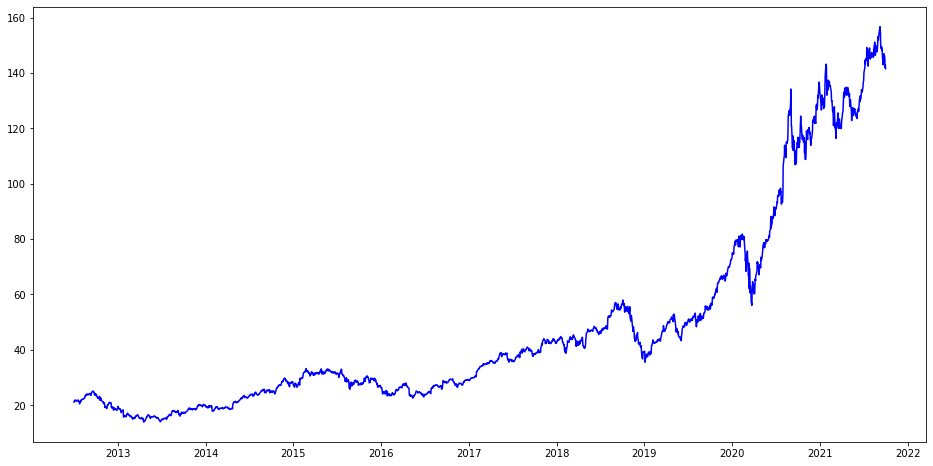

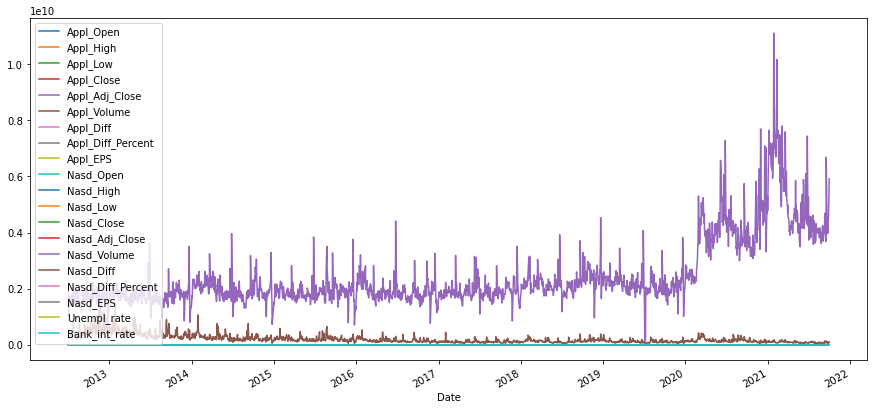

In [4]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Appl_Close"],label='Closing Price',c='blue')
df.head()
df.describe()
df.set_index('Date',inplace=True)


from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
test_result=adfuller(df['Appl_Close'])

In [7]:
def adfuller_test(Appl_Close):
    result=adfuller(Appl_Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )



In [8]:
df['Sales First Difference'] = df['Appl_Close'] - df['Appl_Close'].shift(1)
df['Seasonal First Difference']=df['Appl_Close']-df['Appl_Close'].shift(12)
df.head()

,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,...,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate,Sales First Difference,Seasonal First Difference
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-02,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,...,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25,NaN,NaN
2012-07-03,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,...,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25,0.25,NaN
2012-07-05,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,...,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25,0.37,NaN
2012-07-06,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,...,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25,-0.14,NaN
2012-07-09,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,...,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25,0.28,NaN


In [9]:
# Again testing if data is stationary
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.056781206649361
p-value : 5.349829872708841e-10
#Lags Used : 24
Number of Observations : 2291


<AxesSubplot:xlabel='Date'>

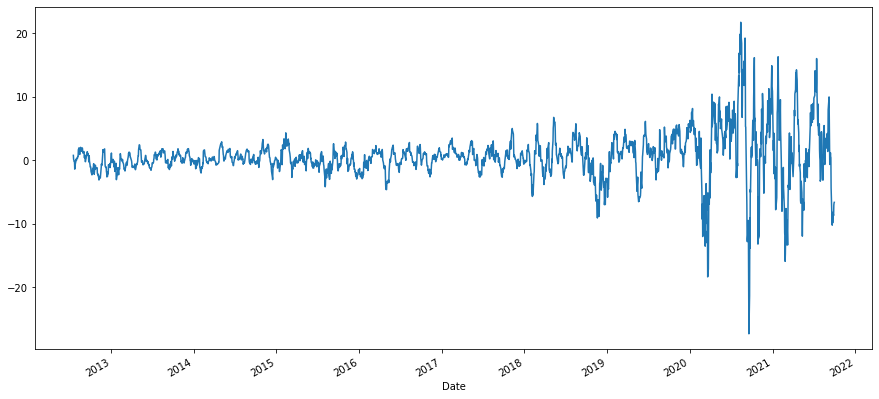

In [10]:
df['Seasonal First Difference'].plot()

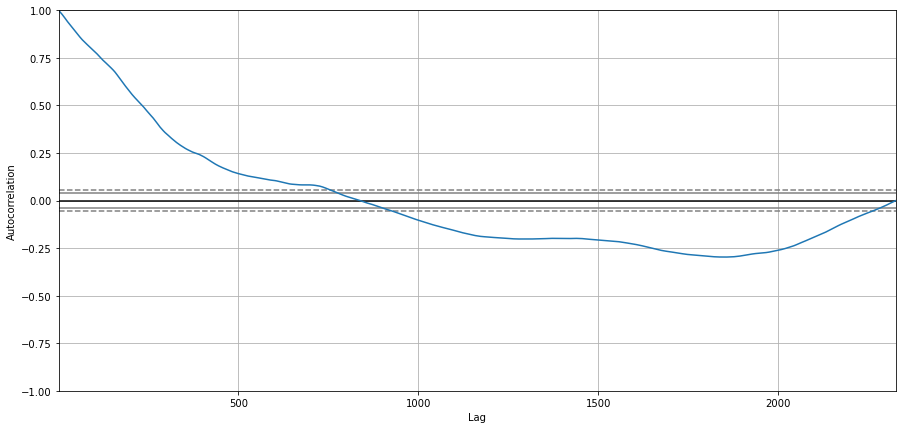

In [11]:
#Autocorrelation

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Appl_Close'])
plt.show()

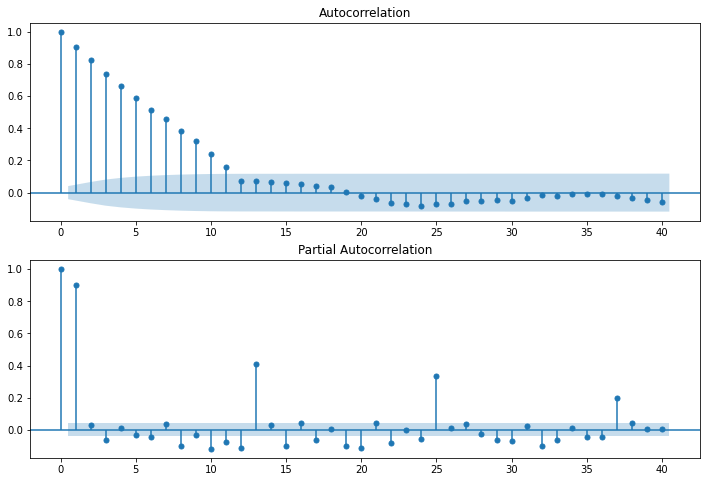

In [12]:
#Partialcorrelation

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [13]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Appl_Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\cppou\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\cppou\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Appl_Close   No. Observations:                 2327
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3627.232
Method:                       css-mle   S.D. of innovations              1.150
Date:                Sat, 11 Dec 2021   AIC                           7262.464
Time:                        07:02:51   BIC                           7285.473
Sample:                             1   HQIC                          7270.848
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0518      0.022      2.330      0.020       0.008       0.095
ar.L1.D.Appl_Close    -0.3984      0.166     -2.393      0.017      -0.725      -0.072
ma.L1.D.Appl_Close     0.3033      0.173      1.755      0.079      -0.035       0.642
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.5098           +0.0000j            2.5098            0.5000
MA.1           -3.2970           +0.0000j            3.2970            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

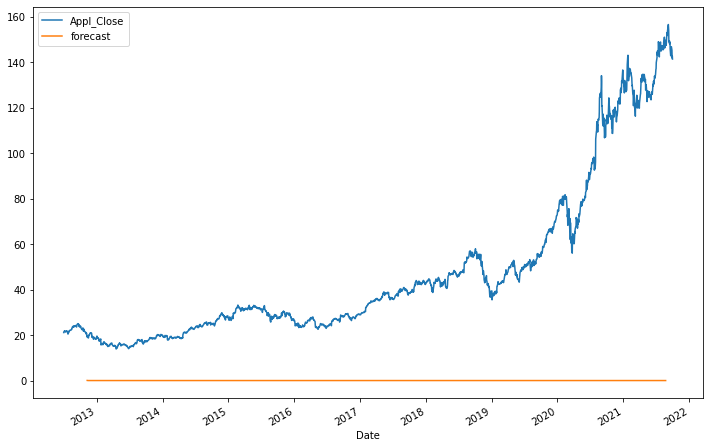

In [14]:
df['forecast']=model_fit.predict(start=90,end=2300,dynamic=True)
df[['Appl_Close','forecast']].plot(figsize=(12,8))

C:\Users\cppou\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\cppou\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<AxesSubplot:xlabel='Date'>

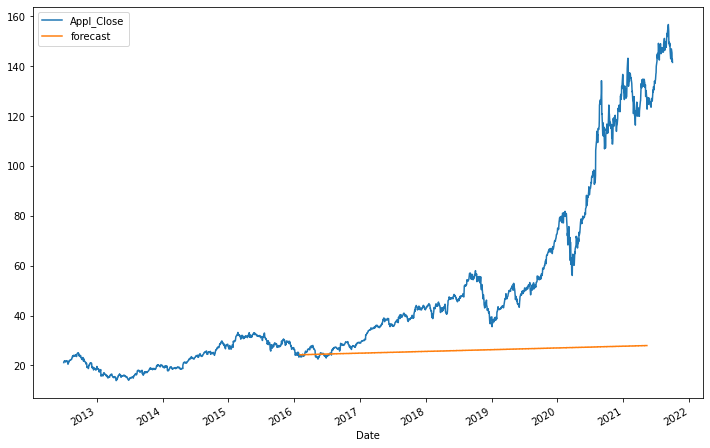

In [18]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Appl_Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=900,end=2228,dynamic=True)
df[['Appl_Close','forecast']].plot(figsize=(12,8))

<AxesSubplot:>

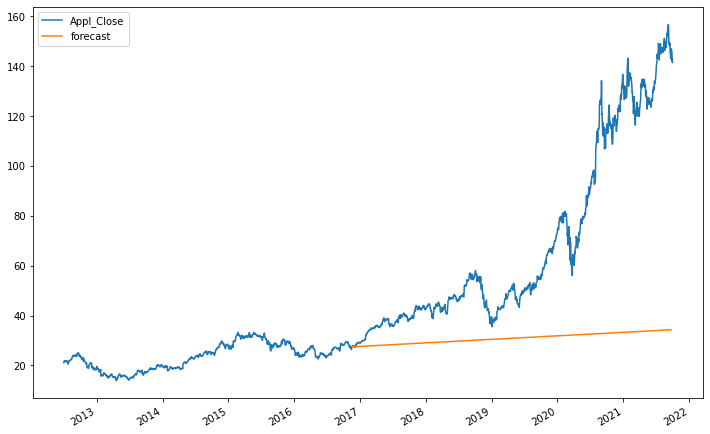

In [16]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 1104, end = 2320, dynamic= True)
future_df[['Appl_Close', 'forecast']].plot(figsize=(12, 8))

In [17]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.df(df_log['Appl_Close'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_log)
plt.plot(predictions_ARIMA)

AttributeError: module 'pandas' has no attribute 'df'